# Data Cleaning

#### importing libs

In [22]:
import pandas as pd
import seaborn as sb

In [86]:
df1 = pd.read_csv("../data/train.csv")

In [48]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Checking for missing values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
print( "the percentage of missing values int he age column is:",(df['Age'].isnull().sum()/df.shape[0])*100)

the percentage of missing values int he age column is: 19.865319865319865


In [15]:
print( "the percentage of missing values int he age column is:",(df['Cabin'].isnull().sum()/df.shape[0])*100)

the percentage of missing values int he age column is: 77.10437710437711


In [65]:
df = df.drop(["Cabin"], axis=1)

In [66]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,27.5,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,34.5,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,27.5,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,34.5,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,27.5,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,30.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,34.5,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,34.5,0,0,111369,30.0000,C


<AxesSubplot:xlabel='Parch', ylabel='Age'>

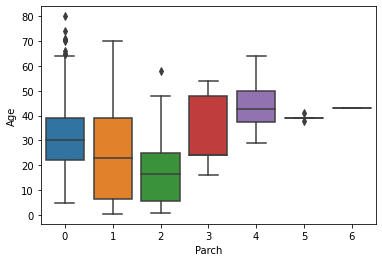

In [23]:
sb.boxplot( x= "Parch", y= "Age", data = df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

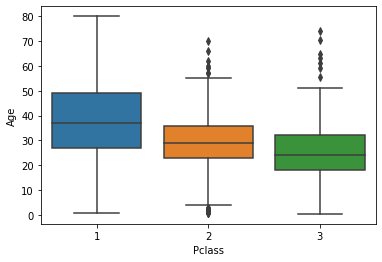

In [24]:
sb.boxplot( x= "Pclass", y= "Age", data = df)

In [61]:
def cal_age(columns):
    parch_list = [ 30, 23, 18, 36, 43, 43, 45]
    pclass_list = [39, 30, 25]
    
    Pclass = columns[2]
    Parch = columns[1]
    Age = columns[0]
    
    if pd.isnull(Age):
        New_age = (parch_list[Parch] + pclass_list[Pclass-1])/2
    
    return New_age


In [62]:
df["Age"] = df[["Age","Parch","Pclass"]].apply(cal_age, axis = 1)

In [67]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [109]:
df.dropna(inplace=True)

In [72]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


#### Checking for duplicates

In [80]:
clones = df[df.duplicated()]


In [81]:
clones

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [82]:
df.drop("PassengerId", axis=1, inplace=True)

In [83]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,27.5,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,34.5,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,27.5,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,34.5,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,27.5,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,30.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,34.5,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,34.5,0,0,111369,30.0000,C


#### Outliers

In [84]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,28.789089,0.524184,0.382452,32.096681
std,0.486260,0.834700,3.481564,1.103705,0.806761,49.697504
min,0.000000,1.000000,21.500000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,27.500000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.500000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,30.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,41.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

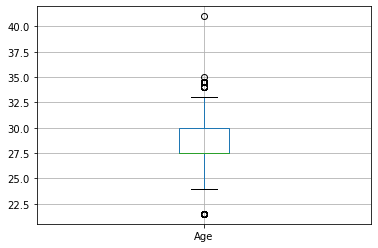

In [88]:
df.boxplot(column="Age")

<AxesSubplot:>

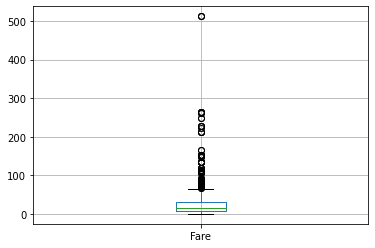

In [89]:
df.boxplot(column="Fare")

In [104]:
outliers = df [df["Fare"]>=150]

In [105]:
outliers.shape

(29, 10)

In [106]:
df = df [df["Fare"]<=150]

In [107]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,27.5,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,34.5,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,27.5,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,34.5,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,27.5,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,30.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,34.5,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,34.5,0,0,111369,30.0000,C


In [111]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000
mean,0.372093,2.355814,28.691279,0.519767,0.358140,25.059834
std,0.483644,0.812533,3.452705,1.107002,0.788223,26.269657
min,0.000000,1.000000,21.500000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,27.500000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.500000,0.000000,0.000000,13.500000
75%,1.000000,3.000000,30.000000,1.000000,0.000000,29.125000
max,1.000000,3.000000,35.000000,8.000000,6.000000,146.520800
